## Importing Necessary Packages and Directories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import cv2
from PIL import Image
import skimage

In [2]:
print(tf.__version__)

2.4.1


In [3]:
root_dir  = "C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations"
annot_dir = "C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/target_feature_AOI"
img_dir = "C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips"
all_img_dir = "C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new/"

img_sizes = [row,col,chan] = [750,750,3]

## Adjusting Bounding Boxes and getting in poly format

In [4]:
width_adj = height_adj = int((1024 - 750)/2)

In [5]:
os.chdir(annot_dir)
#Traverse all csv files
def find_bbox(filename,directory):
    os.chdir(directory)
    df = pd.read_csv(filename)
    df.columns = ['BBox','ID','Name']
    df = df.drop(['ID'],axis = 1)
     
    entry = df["BBox"].iloc[0]
    start = entry.find("(") + 3
    end = entry.find(")))")
    substring = entry[start:end]
    points = substring.split(',')
        
    img_bboxes = []
    for bboxes in range(len(df[["BBox"]])):
        entry = df["BBox"].iloc[bboxes]
        start = entry.find("(") + 3
        end = entry.find(")))")
        substring = entry[start:end]
        points = substring.split(',')

        #Traverse each co-ordinate
        fin_coords = []
        for pt in points:
            indi_coords = []
            coords = pt.split(' ')
            #Traverse each x and y of co-ordinate
            for xy in coords:
                st = ""
                #Traverse each character of co-ordiante 
                for ch in range(len(xy)):
                    if(xy[ch].isdigit() or xy[ch]=='.'):
                        st += xy[ch]

                indi_coords.append(int(float(st)+width_adj))
            fin_coords.append(indi_coords)
        img_bboxes.append(fin_coords)
    
    return img_bboxes

In [6]:
find_bbox("1J01.csv",annot_dir)

[[[358, 301], [502, 307], [502, 353], [357, 342], [358, 301]],
 [[363, 387],
  [490, 395],
  [492, 561],
  [363, 558],
  [360, 548],
  [356, 519],
  [363, 519],
  [363, 387]],
 [[536, 357],
  [565, 358],
  [570, 394],
  [599, 395],
  [596, 554],
  [537, 554],
  [536, 357]],
 [[648, 396],
  [727, 397],
  [723, 576],
  [689, 575],
  [687, 564],
  [646, 557],
  [648, 396]]]

In [7]:
def bounding_box(poly):
    instance_coords = []
    for i in poly:
        x_coords = []
        y_coords = []
        for j in range(len(i)):
            x_coords.append(i[j][0] )
            y_coords.append(i[j][1] )
        instance_coords.append([x_coords,y_coords])
    return instance_coords

In [8]:
bounding_box(find_bbox("1J01.csv",annot_dir))

[[[358, 502, 502, 357, 358], [301, 307, 353, 342, 301]],
 [[363, 490, 492, 363, 360, 356, 363, 363],
  [387, 395, 561, 558, 548, 519, 519, 387]],
 [[536, 565, 570, 599, 596, 537, 536], [357, 358, 394, 395, 554, 554, 357]],
 [[648, 727, 723, 689, 687, 646, 648], [396, 397, 576, 575, 564, 557, 396]]]

## Padding for Shape match

In [9]:
for i in os.listdir(img_dir):
    for j,e in enumerate(os.listdir(img_dir+"/"+i)):
        os.chdir(img_dir+"/"+i) 
        img = plt.imread(e)
        result = np.zeros([1024,1024,3])
        result[height_adj-1:1024-height_adj-1, width_adj-1:1024-width_adj-1,:] = img
        os.chdir(all_img_dir+"/"+i)
        cv2.imwrite(e, result)

## Actual Execution

In [10]:
os.chdir(root_dir + "/updated_mask_rcnn")
!python setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info\PKG-INFO
writing dependency_links to mask_rcnn.egg-info\dependency_links.txt
writing top-level names to mask_rcnn.egg-info\top_level.txt
reading manifest file 'mask_rcnn.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\config.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\model.py -> build\bdist.win-amd64\egg\mrcnn


zip_safe flag not set; analyzing archive contents...


copying build\lib\mrcnn\parallel_model.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\utils.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\visualize.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\__init__.py -> build\bdist.win-amd64\egg\mrcnn
byte-compiling build\bdist.win-amd64\egg\mrcnn\config.py to config.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\mrcnn\model.py to model.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\mrcnn\parallel_model.py to parallel_model.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\mrcnn\utils.py to utils.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\mrcnn\visualize.py to visualize.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\mrcnn\__init__.py to __init__.cpython-38.pyc
creating build\bdist.win-amd64\egg\EGG-INFO
copying mask_rcnn.egg-info\PKG-INFO -> build\bdist.win-amd64\egg\EGG-INFO
copying mask_rcnn.egg-info\SOURCES.txt -> build\bdist.win-amd64\egg\EGG-INFO
cop

In [11]:
pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
Note: you may need to restart the kernel to use updated packages.License: MIT
Location: c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\mask_rcnn-2.1-py3.8.egg
Requires: 
Required-by: 



In [12]:
import mrcnn
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn import model as modellib, utils
from mrcnn import visualize
from mrcnn.model import log

## Architecture for Mask RCNN

In [33]:
class SubstationConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "substation"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1
    
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + substation

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    
    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.95
    
    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = SubstationConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.95
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

In [14]:
class SubstationDataset(utils.Dataset):
    def load_substation(self, dataset_dir, subset):
  
        self.add_class("substation", 1, "substation")
        assert subset in ["train", "val"]
        present_dir = dataset_dir + "/"+ subset
        
        for i,e in enumerate(os.listdir(present_dir)): 
            img_id = 0
            if(subset == "train"):
                img_id = i
            else:
                img_id = 90 + i
                
            os.chdir(present_dir)
            image = skimage.io.imread(e)
            height, width = image.shape[:2]

            poly_mask = bounding_box(find_bbox(f"{e.split('.')[0]}.csv",annot_dir))
                    
            self.add_image(
                "substation",
                image_id=img_id,   
                path= present_dir+"/"+e,
                width=width, height=height,
                polygons=poly_mask)
            print(f"Added Image: {e} with index {img_id} from {present_dir}")
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a balloon dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "substation":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p[1], p[0])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "substation":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [15]:
# Training dataset.
dataset_train = SubstationDataset()
dataset_train.load_substation(all_img_dir, "train")
dataset_train.prepare()

Added Image: 1J01.jpg with index 0 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//train
Added Image: 3J02.jpg with index 1 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//train
Added Image: 4H23.jpg with index 2 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//train
Added Image: 4J01.jpg with index 3 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//train
Added Image: 4J02.jpg with index 4 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//train
Added Image: 6J01.jp

In [16]:
# Validation dataset
dataset_val = SubstationDataset()
dataset_val.load_substation(all_img_dir, "val")
dataset_val.prepare()

Added Image: J2518.jpg with index 90 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val
Added Image: J2519.jpg with index 91 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val
Added Image: J2520.jpg with index 92 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val
Added Image: J2521.jpg with index 93 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val
Added Image: J2522.jpg with index 94 from C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val
Added Image: J2526.j

[27 80 29 39]


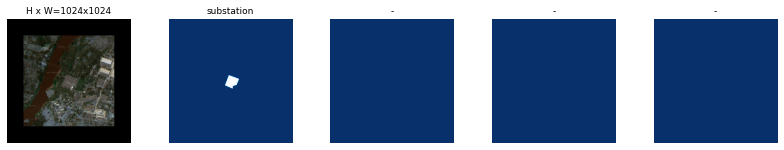

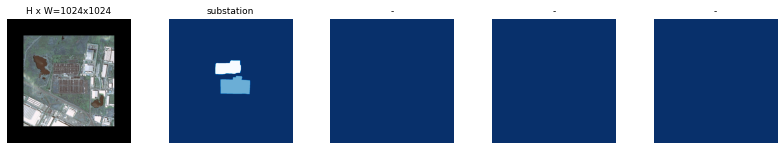

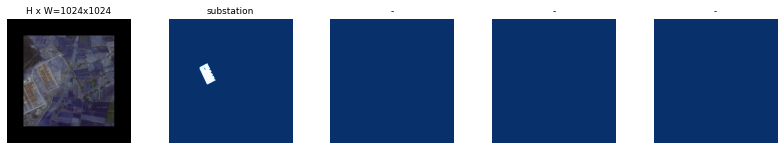

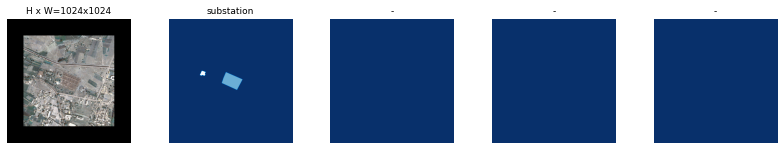

In [17]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
print(image_ids)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [18]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=root_dir)

In [19]:
model.load_weights(root_dir+"/mask_rcnn_coco.h5", by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])

In [20]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations\substation20210722T1817\mask_rcnn_substation_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\indexed_slices.py:435: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unkno

  1/100 [..............................] - ETA: 37:25 - batch: 0.0000e+00 - size: 1.0000 - loss: 4.9743 - rpn_class_loss: 0.5434 - rpn_bbox_loss: 0.4727 - mrcnn_class_loss: 2.4585 - mrcnn_bbox_loss: 0.7992 - mrcnn_mask_loss: 0.7005

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  2/100 [..............................] - ETA: 2:03 - batch: 0.5000 - size: 1.0000 - loss: 4.6212 - rpn_class_loss: 0.3160 - rpn_bbox_loss: 1.1824 - mrcnn_class_loss: 1.4962 - mrcnn_bbox_loss: 0.8920 - mrcnn_mask_loss: 0.7345     

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  3/100 [..............................] - ETA: 1:54 - batch: 1.0000 - size: 1.0000 - loss: 3.9495 - rpn_class_loss: 0.2489 - rpn_bbox_loss: 1.0220 - mrcnn_class_loss: 1.0260 - mrcnn_bbox_loss: 0.8831 - mrcnn_mask_loss: 0.7695

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  4/100 [>.............................] - ETA: 1:54 - batch: 1.5000 - size: 1.0000 - loss: 3.6777 - rpn_class_loss: 0.2056 - rpn_bbox_loss: 1.1013 - mrcnn_class_loss: 0.7854 - mrcnn_bbox_loss: 0.8602 - mrcnn_mask_loss: 0.7253

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  5/100 [>.............................] - ETA: 1:49 - batch: 2.0000 - size: 1.0000 - loss: 3.3564 - rpn_class_loss: 0.1646 - rpn_bbox_loss: 0.8871 - mrcnn_class_loss: 0.6323 - mrcnn_bbox_loss: 0.9811 - mrcnn_mask_loss: 0.6913

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  6/100 [>.............................] - ETA: 1:47 - batch: 2.5000 - size: 1.0000 - loss: 3.1222 - rpn_class_loss: 0.1466 - rpn_bbox_loss: 0.8180 - mrcnn_class_loss: 0.5334 - mrcnn_bbox_loss: 0.9669 - mrcnn_mask_loss: 0.6574

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  7/100 [=>............................] - ETA: 1:45 - batch: 3.0000 - size: 1.0000 - loss: 3.1003 - rpn_class_loss: 0.1257 - rpn_bbox_loss: 0.7321 - mrcnn_class_loss: 0.4588 - mrcnn_bbox_loss: 1.1494 - mrcnn_mask_loss: 0.6342

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  8/100 [=>............................] - ETA: 1:44 - batch: 3.5000 - size: 1.0000 - loss: 2.9845 - rpn_class_loss: 0.1112 - rpn_bbox_loss: 0.6845 - mrcnn_class_loss: 0.4097 - mrcnn_bbox_loss: 1.1413 - mrcnn_mask_loss: 0.6378

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


  9/100 [=>............................] - ETA: 1:42 - batch: 4.0000 - size: 1.0000 - loss: 2.7778 - rpn_class_loss: 0.1074 - rpn_bbox_loss: 0.7247 - mrcnn_class_loss: 0.3642 - mrcnn_bbox_loss: 1.0145 - mrcnn_mask_loss: 0.5670

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 10/100 [==>...........................] - ETA: 1:41 - batch: 4.5000 - size: 1.0000 - loss: 2.7481 - rpn_class_loss: 0.0977 - rpn_bbox_loss: 0.7107 - mrcnn_class_loss: 0.3355 - mrcnn_bbox_loss: 1.0283 - mrcnn_mask_loss: 0.5758

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 11/100 [==>...........................] - ETA: 1:39 - batch: 5.0000 - size: 1.0000 - loss: 2.6873 - rpn_class_loss: 0.0901 - rpn_bbox_loss: 0.6607 - mrcnn_class_loss: 0.3236 - mrcnn_bbox_loss: 1.0453 - mrcnn_mask_loss: 0.5676

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 12/100 [==>...........................] - ETA: 1:38 - batch: 5.5000 - size: 1.0000 - loss: 2.6716 - rpn_class_loss: 0.1131 - rpn_bbox_loss: 0.6278 - mrcnn_class_loss: 0.3047 - mrcnn_bbox_loss: 1.0532 - mrcnn_mask_loss: 0.5729

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 13/100 [==>...........................] - ETA: 1:37 - batch: 6.0000 - size: 1.0000 - loss: 2.6388 - rpn_class_loss: 0.1300 - rpn_bbox_loss: 0.5998 - mrcnn_class_loss: 0.2860 - mrcnn_bbox_loss: 1.0446 - mrcnn_mask_loss: 0.5784

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 14/100 [===>..........................] - ETA: 1:36 - batch: 6.5000 - size: 1.0000 - loss: 2.6115 - rpn_class_loss: 0.1236 - rpn_bbox_loss: 0.5822 - mrcnn_class_loss: 0.2685 - mrcnn_bbox_loss: 1.0609 - mrcnn_mask_loss: 0.5763

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 15/100 [===>..........................] - ETA: 1:35 - batch: 7.0000 - size: 1.0000 - loss: 2.6531 - rpn_class_loss: 0.1196 - rpn_bbox_loss: 0.5933 - mrcnn_class_loss: 0.2734 - mrcnn_bbox_loss: 1.0852 - mrcnn_mask_loss: 0.5815

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 16/100 [===>..........................] - ETA: 1:34 - batch: 7.5000 - size: 1.0000 - loss: 2.5914 - rpn_class_loss: 0.1141 - rpn_bbox_loss: 0.5685 - mrcnn_class_loss: 0.2635 - mrcnn_bbox_loss: 1.0723 - mrcnn_mask_loss: 0.5730

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 17/100 [====>.........................] - ETA: 1:33 - batch: 8.0000 - size: 1.0000 - loss: 2.5872 - rpn_class_loss: 0.1097 - rpn_bbox_loss: 0.5477 - mrcnn_class_loss: 0.2486 - mrcnn_bbox_loss: 1.1002 - mrcnn_mask_loss: 0.5810

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 18/100 [====>.........................] - ETA: 1:32 - batch: 8.5000 - size: 1.0000 - loss: 2.5441 - rpn_class_loss: 0.1042 - rpn_bbox_loss: 0.5266 - mrcnn_class_loss: 0.2451 - mrcnn_bbox_loss: 1.0825 - mrcnn_mask_loss: 0.5857

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 19/100 [====>.........................] - ETA: 1:31 - batch: 9.0000 - size: 1.0000 - loss: 2.4987 - rpn_class_loss: 0.1000 - rpn_bbox_loss: 0.5081 - mrcnn_class_loss: 0.2388 - mrcnn_bbox_loss: 1.0676 - mrcnn_mask_loss: 0.5843

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 20/100 [=====>........................] - ETA: 1:30 - batch: 9.5000 - size: 1.0000 - loss: 2.4872 - rpn_class_loss: 0.0971 - rpn_bbox_loss: 0.5104 - mrcnn_class_loss: 0.2301 - mrcnn_bbox_loss: 1.0737 - mrcnn_mask_loss: 0.5760

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 21/100 [=====>........................] - ETA: 1:29 - batch: 10.0000 - size: 1.0000 - loss: 2.4787 - rpn_class_loss: 0.0945 - rpn_bbox_loss: 0.4968 - mrcnn_class_loss: 0.2226 - mrcnn_bbox_loss: 1.0974 - mrcnn_mask_loss: 0.5675

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 22/100 [=====>........................] - ETA: 1:28 - batch: 10.5000 - size: 1.0000 - loss: 2.4819 - rpn_class_loss: 0.0926 - rpn_bbox_loss: 0.4959 - mrcnn_class_loss: 0.2188 - mrcnn_bbox_loss: 1.1109 - mrcnn_mask_loss: 0.5638

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 23/100 [=====>........................] - ETA: 1:27 - batch: 11.0000 - size: 1.0000 - loss: 2.4606 - rpn_class_loss: 0.0894 - rpn_bbox_loss: 0.4954 - mrcnn_class_loss: 0.2102 - mrcnn_bbox_loss: 1.0843 - mrcnn_mask_loss: 0.5813

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 24/100 [======>.......................] - ETA: 1:26 - batch: 11.5000 - size: 1.0000 - loss: 2.4082 - rpn_class_loss: 0.0870 - rpn_bbox_loss: 0.4787 - mrcnn_class_loss: 0.2037 - mrcnn_bbox_loss: 1.0693 - mrcnn_mask_loss: 0.5694

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 25/100 [======>.......................] - ETA: 1:25 - batch: 12.0000 - size: 1.0000 - loss: 2.3714 - rpn_class_loss: 0.0841 - rpn_bbox_loss: 0.4635 - mrcnn_class_loss: 0.2031 - mrcnn_bbox_loss: 1.0568 - mrcnn_mask_loss: 0.5640

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 26/100 [======>.......................] - ETA: 1:24 - batch: 12.5000 - size: 1.0000 - loss: 2.3329 - rpn_class_loss: 0.0815 - rpn_bbox_loss: 0.4488 - mrcnn_class_loss: 0.1968 - mrcnn_bbox_loss: 1.0467 - mrcnn_mask_loss: 0.5590

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 27/100 [=======>......................] - ETA: 1:23 - batch: 13.0000 - size: 1.0000 - loss: 2.3080 - rpn_class_loss: 0.0789 - rpn_bbox_loss: 0.4516 - mrcnn_class_loss: 0.1913 - mrcnn_bbox_loss: 1.0372 - mrcnn_mask_loss: 0.5490

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 28/100 [=======>......................] - ETA: 1:22 - batch: 13.5000 - size: 1.0000 - loss: 2.2710 - rpn_class_loss: 0.0771 - rpn_bbox_loss: 0.4421 - mrcnn_class_loss: 0.1869 - mrcnn_bbox_loss: 1.0185 - mrcnn_mask_loss: 0.5465

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 29/100 [=======>......................] - ETA: 1:20 - batch: 14.0000 - size: 1.0000 - loss: 2.2270 - rpn_class_loss: 0.0749 - rpn_bbox_loss: 0.4417 - mrcnn_class_loss: 0.1818 - mrcnn_bbox_loss: 0.9907 - mrcnn_mask_loss: 0.5379

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 30/100 [========>.....................] - ETA: 1:19 - batch: 14.5000 - size: 1.0000 - loss: 2.2129 - rpn_class_loss: 0.0744 - rpn_bbox_loss: 0.4454 - mrcnn_class_loss: 0.1759 - mrcnn_bbox_loss: 0.9806 - mrcnn_mask_loss: 0.5367

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 31/100 [========>.....................] - ETA: 1:18 - batch: 15.0000 - size: 1.0000 - loss: 2.2202 - rpn_class_loss: 0.0735 - rpn_bbox_loss: 0.4661 - mrcnn_class_loss: 0.1728 - mrcnn_bbox_loss: 0.9752 - mrcnn_mask_loss: 0.5326

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 32/100 [========>.....................] - ETA: 1:17 - batch: 15.5000 - size: 1.0000 - loss: 2.2061 - rpn_class_loss: 0.0723 - rpn_bbox_loss: 0.4579 - mrcnn_class_loss: 0.1699 - mrcnn_bbox_loss: 0.9796 - mrcnn_mask_loss: 0.5263

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 33/100 [========>.....................] - ETA: 1:16 - batch: 16.0000 - size: 1.0000 - loss: 2.2385 - rpn_class_loss: 0.0733 - rpn_bbox_loss: 0.4851 - mrcnn_class_loss: 0.1677 - mrcnn_bbox_loss: 0.9789 - mrcnn_mask_loss: 0.5334

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 34/100 [=========>....................] - ETA: 1:15 - batch: 16.5000 - size: 1.0000 - loss: 2.2177 - rpn_class_loss: 0.0722 - rpn_bbox_loss: 0.4888 - mrcnn_class_loss: 0.1649 - mrcnn_bbox_loss: 0.9639 - mrcnn_mask_loss: 0.5279

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 35/100 [=========>....................] - ETA: 1:14 - batch: 17.0000 - size: 1.0000 - loss: 2.2213 - rpn_class_loss: 0.0705 - rpn_bbox_loss: 0.4903 - mrcnn_class_loss: 0.1636 - mrcnn_bbox_loss: 0.9587 - mrcnn_mask_loss: 0.5382

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 36/100 [=========>....................] - ETA: 1:12 - batch: 17.5000 - size: 1.0000 - loss: 2.2093 - rpn_class_loss: 0.0689 - rpn_bbox_loss: 0.4814 - mrcnn_class_loss: 0.1639 - mrcnn_bbox_loss: 0.9626 - mrcnn_mask_loss: 0.5324

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 37/100 [==========>...................] - ETA: 1:11 - batch: 18.0000 - size: 1.0000 - loss: 2.1890 - rpn_class_loss: 0.0684 - rpn_bbox_loss: 0.4803 - mrcnn_class_loss: 0.1609 - mrcnn_bbox_loss: 0.9520 - mrcnn_mask_loss: 0.5274

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 38/100 [==========>...................] - ETA: 1:10 - batch: 18.5000 - size: 1.0000 - loss: 2.2014 - rpn_class_loss: 0.0678 - rpn_bbox_loss: 0.4884 - mrcnn_class_loss: 0.1624 - mrcnn_bbox_loss: 0.9549 - mrcnn_mask_loss: 0.5280

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 39/100 [==========>...................] - ETA: 1:09 - batch: 19.0000 - size: 1.0000 - loss: 2.2131 - rpn_class_loss: 0.0706 - rpn_bbox_loss: 0.5017 - mrcnn_class_loss: 0.1624 - mrcnn_bbox_loss: 0.9522 - mrcnn_mask_loss: 0.5262

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 40/100 [===========>..................] - ETA: 1:08 - batch: 19.5000 - size: 1.0000 - loss: 2.2250 - rpn_class_loss: 0.0708 - rpn_bbox_loss: 0.5197 - mrcnn_class_loss: 0.1632 - mrcnn_bbox_loss: 0.9468 - mrcnn_mask_loss: 0.5246

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 41/100 [===========>..................] - ETA: 1:07 - batch: 20.0000 - size: 1.0000 - loss: 2.2081 - rpn_class_loss: 0.0694 - rpn_bbox_loss: 0.5133 - mrcnn_class_loss: 0.1616 - mrcnn_bbox_loss: 0.9389 - mrcnn_mask_loss: 0.5248

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 42/100 [===========>..................] - ETA: 1:06 - batch: 20.5000 - size: 1.0000 - loss: 2.2069 - rpn_class_loss: 0.0681 - rpn_bbox_loss: 0.5151 - mrcnn_class_loss: 0.1604 - mrcnn_bbox_loss: 0.9414 - mrcnn_mask_loss: 0.5220

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 43/100 [===========>..................] - ETA: 1:05 - batch: 21.0000 - size: 1.0000 - loss: 2.1937 - rpn_class_loss: 0.0670 - rpn_bbox_loss: 0.5116 - mrcnn_class_loss: 0.1587 - mrcnn_bbox_loss: 0.9375 - mrcnn_mask_loss: 0.5190

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 44/100 [============>.................] - ETA: 1:04 - batch: 21.5000 - size: 1.0000 - loss: 2.1803 - rpn_class_loss: 0.0661 - rpn_bbox_loss: 0.5034 - mrcnn_class_loss: 0.1573 - mrcnn_bbox_loss: 0.9350 - mrcnn_mask_loss: 0.5183

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 45/100 [============>.................] - ETA: 1:03 - batch: 22.0000 - size: 1.0000 - loss: 2.1876 - rpn_class_loss: 0.0657 - rpn_bbox_loss: 0.5076 - mrcnn_class_loss: 0.1555 - mrcnn_bbox_loss: 0.9428 - mrcnn_mask_loss: 0.5161

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 46/100 [============>.................] - ETA: 1:01 - batch: 22.5000 - size: 1.0000 - loss: 2.1739 - rpn_class_loss: 0.0644 - rpn_bbox_loss: 0.4998 - mrcnn_class_loss: 0.1529 - mrcnn_bbox_loss: 0.9395 - mrcnn_mask_loss: 0.5173

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 47/100 [=============>................] - ETA: 1:00 - batch: 23.0000 - size: 1.0000 - loss: 2.1725 - rpn_class_loss: 0.0644 - rpn_bbox_loss: 0.5107 - mrcnn_class_loss: 0.1514 - mrcnn_bbox_loss: 0.9318 - mrcnn_mask_loss: 0.5142

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 48/100 [=============>................] - ETA: 59s - batch: 23.5000 - size: 1.0000 - loss: 2.2721 - rpn_class_loss: 0.0659 - rpn_bbox_loss: 0.6130 - mrcnn_class_loss: 0.1489 - mrcnn_bbox_loss: 0.9292 - mrcnn_mask_loss: 0.5151 

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 49/100 [=============>................] - ETA: 58s - batch: 24.0000 - size: 1.0000 - loss: 2.2567 - rpn_class_loss: 0.0653 - rpn_bbox_loss: 0.6076 - mrcnn_class_loss: 0.1465 - mrcnn_bbox_loss: 0.9248 - mrcnn_mask_loss: 0.5125

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 50/100 [==============>...............] - ETA: 57s - batch: 24.5000 - size: 1.0000 - loss: 2.2430 - rpn_class_loss: 0.0643 - rpn_bbox_loss: 0.5981 - mrcnn_class_loss: 0.1478 - mrcnn_bbox_loss: 0.9211 - mrcnn_mask_loss: 0.5117

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 51/100 [==============>...............] - ETA: 56s - batch: 25.0000 - size: 1.0000 - loss: 2.2178 - rpn_class_loss: 0.0631 - rpn_bbox_loss: 0.5894 - mrcnn_class_loss: 0.1452 - mrcnn_bbox_loss: 0.9143 - mrcnn_mask_loss: 0.5058

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 52/100 [==============>...............] - ETA: 55s - batch: 25.5000 - size: 1.0000 - loss: 2.2021 - rpn_class_loss: 0.0621 - rpn_bbox_loss: 0.5833 - mrcnn_class_loss: 0.1445 - mrcnn_bbox_loss: 0.9077 - mrcnn_mask_loss: 0.5045

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 53/100 [==============>...............] - ETA: 53s - batch: 26.0000 - size: 1.0000 - loss: 2.1889 - rpn_class_loss: 0.0611 - rpn_bbox_loss: 0.5756 - mrcnn_class_loss: 0.1434 - mrcnn_bbox_loss: 0.9024 - mrcnn_mask_loss: 0.5064

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 54/100 [===============>..............] - ETA: 52s - batch: 26.5000 - size: 1.0000 - loss: 2.1975 - rpn_class_loss: 0.0606 - rpn_bbox_loss: 0.5911 - mrcnn_class_loss: 0.1408 - mrcnn_bbox_loss: 0.9015 - mrcnn_mask_loss: 0.5036

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 55/100 [===============>..............] - ETA: 51s - batch: 27.0000 - size: 1.0000 - loss: 2.1820 - rpn_class_loss: 0.0596 - rpn_bbox_loss: 0.5841 - mrcnn_class_loss: 0.1426 - mrcnn_bbox_loss: 0.8945 - mrcnn_mask_loss: 0.5011

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 56/100 [===============>..............] - ETA: 50s - batch: 27.5000 - size: 1.0000 - loss: 2.1626 - rpn_class_loss: 0.0589 - rpn_bbox_loss: 0.5754 - mrcnn_class_loss: 0.1424 - mrcnn_bbox_loss: 0.8872 - mrcnn_mask_loss: 0.4988

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 57/100 [================>.............] - ETA: 49s - batch: 28.0000 - size: 1.0000 - loss: 2.1477 - rpn_class_loss: 0.0580 - rpn_bbox_loss: 0.5668 - mrcnn_class_loss: 0.1409 - mrcnn_bbox_loss: 0.8862 - mrcnn_mask_loss: 0.4958

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 58/100 [================>.............] - ETA: 48s - batch: 28.5000 - size: 1.0000 - loss: 2.1364 - rpn_class_loss: 0.0571 - rpn_bbox_loss: 0.5608 - mrcnn_class_loss: 0.1407 - mrcnn_bbox_loss: 0.8835 - mrcnn_mask_loss: 0.4943

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 59/100 [================>.............] - ETA: 47s - batch: 29.0000 - size: 1.0000 - loss: 2.1215 - rpn_class_loss: 0.0564 - rpn_bbox_loss: 0.5578 - mrcnn_class_loss: 0.1386 - mrcnn_bbox_loss: 0.8784 - mrcnn_mask_loss: 0.4904

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 60/100 [=================>............] - ETA: 45s - batch: 29.5000 - size: 1.0000 - loss: 2.0986 - rpn_class_loss: 0.0561 - rpn_bbox_loss: 0.5528 - mrcnn_class_loss: 0.1368 - mrcnn_bbox_loss: 0.8667 - mrcnn_mask_loss: 0.4861

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 61/100 [=================>............] - ETA: 44s - batch: 30.0000 - size: 1.0000 - loss: 2.0806 - rpn_class_loss: 0.0555 - rpn_bbox_loss: 0.5478 - mrcnn_class_loss: 0.1347 - mrcnn_bbox_loss: 0.8597 - mrcnn_mask_loss: 0.4829

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 62/100 [=================>............] - ETA: 43s - batch: 30.5000 - size: 1.0000 - loss: 2.0562 - rpn_class_loss: 0.0547 - rpn_bbox_loss: 0.5424 - mrcnn_class_loss: 0.1326 - mrcnn_bbox_loss: 0.8474 - mrcnn_mask_loss: 0.4792

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 63/100 [=================>............] - ETA: 42s - batch: 31.0000 - size: 1.0000 - loss: 2.0710 - rpn_class_loss: 0.0541 - rpn_bbox_loss: 0.5578 - mrcnn_class_loss: 0.1314 - mrcnn_bbox_loss: 0.8492 - mrcnn_mask_loss: 0.4785

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 64/100 [==================>...........] - ETA: 41s - batch: 31.5000 - size: 1.0000 - loss: 2.0775 - rpn_class_loss: 0.0536 - rpn_bbox_loss: 0.5645 - mrcnn_class_loss: 0.1302 - mrcnn_bbox_loss: 0.8512 - mrcnn_mask_loss: 0.4781

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 65/100 [==================>...........] - ETA: 40s - batch: 32.0000 - size: 1.0000 - loss: 2.1316 - rpn_class_loss: 0.0538 - rpn_bbox_loss: 0.6105 - mrcnn_class_loss: 0.1299 - mrcnn_bbox_loss: 0.8608 - mrcnn_mask_loss: 0.4767

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 66/100 [==================>...........] - ETA: 39s - batch: 32.5000 - size: 1.0000 - loss: 2.1236 - rpn_class_loss: 0.0533 - rpn_bbox_loss: 0.6058 - mrcnn_class_loss: 0.1295 - mrcnn_bbox_loss: 0.8603 - mrcnn_mask_loss: 0.4747

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 67/100 [===================>..........] - ETA: 37s - batch: 33.0000 - size: 1.0000 - loss: 2.1250 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.6107 - mrcnn_class_loss: 0.1304 - mrcnn_bbox_loss: 0.8576 - mrcnn_mask_loss: 0.4730

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 68/100 [===================>..........] - ETA: 36s - batch: 33.5000 - size: 1.0000 - loss: 2.1249 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.6028 - mrcnn_class_loss: 0.1287 - mrcnn_bbox_loss: 0.8664 - mrcnn_mask_loss: 0.4743

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 69/100 [===================>..........] - ETA: 35s - batch: 34.0000 - size: 1.0000 - loss: 2.1177 - rpn_class_loss: 0.0521 - rpn_bbox_loss: 0.5995 - mrcnn_class_loss: 0.1286 - mrcnn_bbox_loss: 0.8643 - mrcnn_mask_loss: 0.4732

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 70/100 [====================>.........] - ETA: 34s - batch: 34.5000 - size: 1.0000 - loss: 2.1042 - rpn_class_loss: 0.0515 - rpn_bbox_loss: 0.5934 - mrcnn_class_loss: 0.1279 - mrcnn_bbox_loss: 0.8591 - mrcnn_mask_loss: 0.4722

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 71/100 [====================>.........] - ETA: 33s - batch: 35.0000 - size: 1.0000 - loss: 2.0923 - rpn_class_loss: 0.0511 - rpn_bbox_loss: 0.5896 - mrcnn_class_loss: 0.1286 - mrcnn_bbox_loss: 0.8529 - mrcnn_mask_loss: 0.4701

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 72/100 [====================>.........] - ETA: 32s - batch: 35.5000 - size: 1.0000 - loss: 2.0954 - rpn_class_loss: 0.0510 - rpn_bbox_loss: 0.5931 - mrcnn_class_loss: 0.1283 - mrcnn_bbox_loss: 0.8488 - mrcnn_mask_loss: 0.4742

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 73/100 [====================>.........] - ETA: 31s - batch: 36.0000 - size: 1.0000 - loss: 2.0905 - rpn_class_loss: 0.0507 - rpn_bbox_loss: 0.5875 - mrcnn_class_loss: 0.1277 - mrcnn_bbox_loss: 0.8481 - mrcnn_mask_loss: 0.4764

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 74/100 [=====================>........] - ETA: 29s - batch: 36.5000 - size: 1.0000 - loss: 2.0840 - rpn_class_loss: 0.0501 - rpn_bbox_loss: 0.5833 - mrcnn_class_loss: 0.1279 - mrcnn_bbox_loss: 0.8479 - mrcnn_mask_loss: 0.4747

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 75/100 [=====================>........] - ETA: 28s - batch: 37.0000 - size: 1.0000 - loss: 2.0778 - rpn_class_loss: 0.0497 - rpn_bbox_loss: 0.5832 - mrcnn_class_loss: 0.1267 - mrcnn_bbox_loss: 0.8445 - mrcnn_mask_loss: 0.4737

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 76/100 [=====================>........] - ETA: 27s - batch: 37.5000 - size: 1.0000 - loss: 2.0627 - rpn_class_loss: 0.0493 - rpn_bbox_loss: 0.5765 - mrcnn_class_loss: 0.1265 - mrcnn_bbox_loss: 0.8379 - mrcnn_mask_loss: 0.4726

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 77/100 [======================>.......] - ETA: 26s - batch: 38.0000 - size: 1.0000 - loss: 2.0522 - rpn_class_loss: 0.0488 - rpn_bbox_loss: 0.5729 - mrcnn_class_loss: 0.1257 - mrcnn_bbox_loss: 0.8336 - mrcnn_mask_loss: 0.4712

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 78/100 [======================>.......] - ETA: 25s - batch: 38.5000 - size: 1.0000 - loss: 2.0452 - rpn_class_loss: 0.0483 - rpn_bbox_loss: 0.5704 - mrcnn_class_loss: 0.1246 - mrcnn_bbox_loss: 0.8303 - mrcnn_mask_loss: 0.4715

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 79/100 [======================>.......] - ETA: 24s - batch: 39.0000 - size: 1.0000 - loss: 2.0370 - rpn_class_loss: 0.0481 - rpn_bbox_loss: 0.5677 - mrcnn_class_loss: 0.1246 - mrcnn_bbox_loss: 0.8260 - mrcnn_mask_loss: 0.4706

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 80/100 [=======================>......] - ETA: 23s - batch: 39.5000 - size: 1.0000 - loss: 2.0203 - rpn_class_loss: 0.0477 - rpn_bbox_loss: 0.5614 - mrcnn_class_loss: 0.1240 - mrcnn_bbox_loss: 0.8178 - mrcnn_mask_loss: 0.4694

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 81/100 [=======================>......] - ETA: 21s - batch: 40.0000 - size: 1.0000 - loss: 2.0166 - rpn_class_loss: 0.0474 - rpn_bbox_loss: 0.5590 - mrcnn_class_loss: 0.1251 - mrcnn_bbox_loss: 0.8155 - mrcnn_mask_loss: 0.4697

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 82/100 [=======================>......] - ETA: 20s - batch: 40.5000 - size: 1.0000 - loss: 2.0123 - rpn_class_loss: 0.0472 - rpn_bbox_loss: 0.5594 - mrcnn_class_loss: 0.1247 - mrcnn_bbox_loss: 0.8123 - mrcnn_mask_loss: 0.4686

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 83/100 [=======================>......] - ETA: 19s - batch: 41.0000 - size: 1.0000 - loss: 2.0015 - rpn_class_loss: 0.0468 - rpn_bbox_loss: 0.5546 - mrcnn_class_loss: 0.1241 - mrcnn_bbox_loss: 0.8091 - mrcnn_mask_loss: 0.4669

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 84/100 [========================>.....] - ETA: 18s - batch: 41.5000 - size: 1.0000 - loss: 1.9935 - rpn_class_loss: 0.0465 - rpn_bbox_loss: 0.5495 - mrcnn_class_loss: 0.1234 - mrcnn_bbox_loss: 0.8073 - mrcnn_mask_loss: 0.4668

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 85/100 [========================>.....] - ETA: 17s - batch: 42.0000 - size: 1.0000 - loss: 1.9872 - rpn_class_loss: 0.0461 - rpn_bbox_loss: 0.5476 - mrcnn_class_loss: 0.1240 - mrcnn_bbox_loss: 0.8051 - mrcnn_mask_loss: 0.4644

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 86/100 [========================>.....] - ETA: 16s - batch: 42.5000 - size: 1.0000 - loss: 1.9825 - rpn_class_loss: 0.0457 - rpn_bbox_loss: 0.5453 - mrcnn_class_loss: 0.1242 - mrcnn_bbox_loss: 0.8045 - mrcnn_mask_loss: 0.4627

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 87/100 [=========================>....] - ETA: 15s - batch: 43.0000 - size: 1.0000 - loss: 1.9821 - rpn_class_loss: 0.0455 - rpn_bbox_loss: 0.5477 - mrcnn_class_loss: 0.1240 - mrcnn_bbox_loss: 0.8027 - mrcnn_mask_loss: 0.4622

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 88/100 [=========================>....] - ETA: 13s - batch: 43.5000 - size: 1.0000 - loss: 1.9820 - rpn_class_loss: 0.0452 - rpn_bbox_loss: 0.5447 - mrcnn_class_loss: 0.1238 - mrcnn_bbox_loss: 0.8059 - mrcnn_mask_loss: 0.4624

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 89/100 [=========================>....] - ETA: 12s - batch: 44.0000 - size: 1.0000 - loss: 1.9828 - rpn_class_loss: 0.0451 - rpn_bbox_loss: 0.5452 - mrcnn_class_loss: 0.1245 - mrcnn_bbox_loss: 0.8070 - mrcnn_mask_loss: 0.4610

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 90/100 [==========================>...] - ETA: 11s - batch: 44.5000 - size: 1.0000 - loss: 1.9696 - rpn_class_loss: 0.0449 - rpn_bbox_loss: 0.5401 - mrcnn_class_loss: 0.1241 - mrcnn_bbox_loss: 0.8027 - mrcnn_mask_loss: 0.4578

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 91/100 [==========================>...] - ETA: 10s - batch: 45.0000 - size: 1.0000 - loss: 1.9640 - rpn_class_loss: 0.0446 - rpn_bbox_loss: 0.5382 - mrcnn_class_loss: 0.1237 - mrcnn_bbox_loss: 0.8007 - mrcnn_mask_loss: 0.4568

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 92/100 [==========================>...] - ETA: 9s - batch: 45.5000 - size: 1.0000 - loss: 1.9640 - rpn_class_loss: 0.0442 - rpn_bbox_loss: 0.5429 - mrcnn_class_loss: 0.1227 - mrcnn_bbox_loss: 0.7983 - mrcnn_mask_loss: 0.4559 

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 93/100 [==========================>...] - ETA: 8s - batch: 46.0000 - size: 1.0000 - loss: 1.9575 - rpn_class_loss: 0.0439 - rpn_bbox_loss: 0.5384 - mrcnn_class_loss: 0.1224 - mrcnn_bbox_loss: 0.7934 - mrcnn_mask_loss: 0.4595

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 94/100 [===========================>..] - ETA: 6s - batch: 46.5000 - size: 1.0000 - loss: 1.9484 - rpn_class_loss: 0.0435 - rpn_bbox_loss: 0.5348 - mrcnn_class_loss: 0.1216 - mrcnn_bbox_loss: 0.7886 - mrcnn_mask_loss: 0.4599

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 95/100 [===========================>..] - ETA: 5s - batch: 47.0000 - size: 1.0000 - loss: 1.9405 - rpn_class_loss: 0.0434 - rpn_bbox_loss: 0.5326 - mrcnn_class_loss: 0.1213 - mrcnn_bbox_loss: 0.7841 - mrcnn_mask_loss: 0.4591

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 96/100 [===========================>..] - ETA: 4s - batch: 47.5000 - size: 1.0000 - loss: 1.9370 - rpn_class_loss: 0.0430 - rpn_bbox_loss: 0.5330 - mrcnn_class_loss: 0.1203 - mrcnn_bbox_loss: 0.7828 - mrcnn_mask_loss: 0.4579

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 97/100 [============================>.] - ETA: 3s - batch: 48.0000 - size: 1.0000 - loss: 1.9428 - rpn_class_loss: 0.0433 - rpn_bbox_loss: 0.5366 - mrcnn_class_loss: 0.1215 - mrcnn_bbox_loss: 0.7813 - mrcnn_mask_loss: 0.4600

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 98/100 [============================>.] - ETA: 2s - batch: 48.5000 - size: 1.0000 - loss: 1.9357 - rpn_class_loss: 0.0430 - rpn_bbox_loss: 0.5331 - mrcnn_class_loss: 0.1204 - mrcnn_bbox_loss: 0.7818 - mrcnn_mask_loss: 0.4573

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 99/100 [============================>.] - ETA: 1s - batch: 49.0000 - size: 1.0000 - loss: 1.9320 - rpn_class_loss: 0.0427 - rpn_bbox_loss: 0.5302 - mrcnn_class_loss: 0.1210 - mrcnn_bbox_loss: 0.7796 - mrcnn_mask_loss: 0.4586

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 1.0000 - loss: 1.9332 - rpn_class_loss: 0.0426 - rpn_bbox_loss: 0.5309 - mrcnn_class_loss: 0.1212 - mrcnn_bbox_loss: 0.7791 - mrcnn_mask_loss: 0.4594

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or ex

100/100 [==============================] - 162s 1s/step - batch: 49.5000 - size: 1.0000 - loss: 1.9332 - rpn_class_loss: 0.0426 - rpn_bbox_loss: 0.5309 - mrcnn_class_loss: 0.1212 - mrcnn_bbox_loss: 0.7791 - mrcnn_mask_loss: 0.4594 - val_loss: 1.8040 - val_rpn_class_loss: 0.0079 - val_rpn_bbox_loss: 0.3411 - val_mrcnn_class_loss: 0.0951 - val_mrcnn_bbox_loss: 0.7121 - val_mrcnn_mask_loss: 0.6478


## Inference

In [21]:
class InferenceConfig(SubstationConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
inference_config = InferenceConfig()
inference_config.display()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=root_dir)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

{'id': 90, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2518.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[432, 542, 592, 645, 650, 646, 635, 629, 628, 597, 571, 564, 555, 546, 540, 531, 524, 521, 492, 485, 449, 455, 396, 363, 375, 378, 388, 400, 409, 416, 432], [363, 387, 396, 409, 411, 428, 468, 487, 496, 490, 486, 508, 550, 584, 617, 650, 674, 701, 698, 715, 706, 687, 675, 668, 631, 610, 564, 520, 476, 449, 363]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  363.00000  max:  716.00000  int32
gt_mask                  shape: (56, 56, 1)          

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


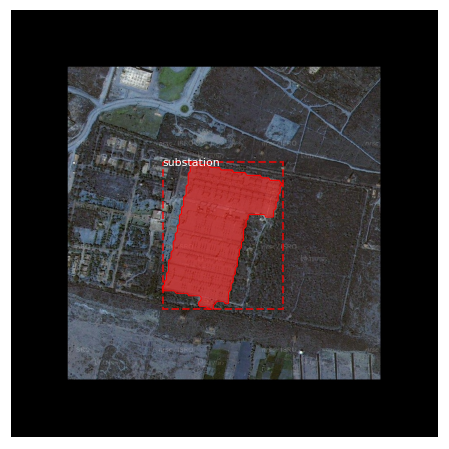

{'id': 92, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2520.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[226, 321, 400, 435, 449, 488, 482, 498, 489, 570, 618, 654, 663, 670, 671, 643, 633, 640, 631, 647, 654, 665, 667, 654, 659, 669, 677, 683, 698, 708, 715, 642, 636, 604, 589, 545, 531, 506, 478, 457, 457, 464, 467, 457, 440, 430, 410, 375, 340, 324, 303, 289, 268, 226], [555, 506, 461, 443, 439, 416, 397, 386, 364, 323, 297, 286, 301, 312, 317, 334, 341, 356, 372, 389, 401, 410, 418, 425, 435, 435, 435, 446, 454, 468, 489, 531, 531, 551, 537, 557, 534, 544, 561, 577, 588, 604, 612, 623, 627, 638, 650, 668, 686, 661, 654, 647, 632, 555]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


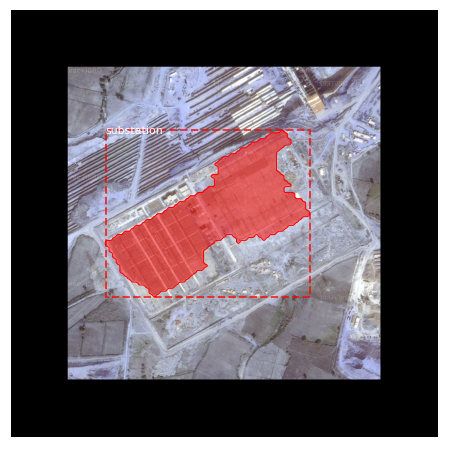

{'id': 90, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2518.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[432, 542, 592, 645, 650, 646, 635, 629, 628, 597, 571, 564, 555, 546, 540, 531, 524, 521, 492, 485, 449, 455, 396, 363, 375, 378, 388, 400, 409, 416, 432], [363, 387, 396, 409, 411, 428, 468, 487, 496, 490, 486, 508, 550, 584, 617, 650, 674, 701, 698, 715, 706, 687, 675, 668, 631, 610, 564, 520, 476, 449, 363]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  363.00000  max:  716.00000  int32
gt_mask                  shape: (56, 56, 1)          

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


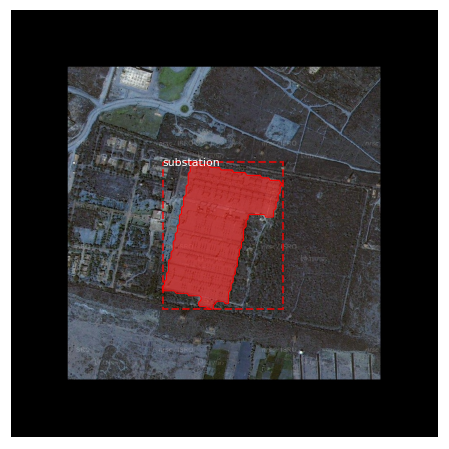

{'id': 97, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/K360.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[292, 381, 399, 469, 464, 716, 727, 763, 798, 694, 689, 684, 679, 669, 654, 634, 615, 600, 606, 571, 560, 502, 493, 435, 425, 321, 292, 434, 447, 460, 469, 474, 475, 475, 475, 474, 470, 469, 467, 465, 463, 455, 447, 441, 429, 424, 418, 416, 425, 425, 427, 434, 586, 594, 658, 649, 586, 624, 630, 659, 658, 624, 559, 554, 546, 550, 564, 589, 610, 626, 638, 649, 651, 646, 643, 559], [404, 391, 454, 442, 410, 356, 393, 389, 564, 585, 577, 570, 564, 564, 566, 572, 576, 576, 607, 613, 586, 597, 560, 573, 535, 546, 404, 539, 539, 535, 534, 529, 524, 514, 508, 502, 489, 483, 473, 463, 455, 450, 450, 450, 451, 454, 457, 458, 502, 503, 508, 539, 480, 511, 502, 463, 480, 517, 530, 524, 510, 517, 399, 415, 429, 439, 439, 434, 430, 427, 424, 417, 410

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


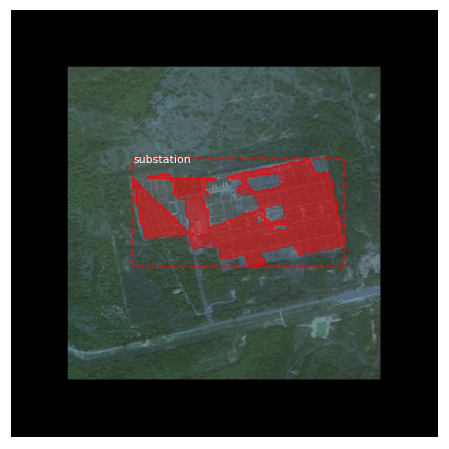

{'id': 93, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2521.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[403, 447, 492, 554, 608, 638, 650, 654, 657, 658, 659, 656, 647, 635, 624, 591, 550, 494, 499, 501, 503, 441, 414, 379, 351, 338, 338, 337, 378, 418, 415, 395, 391, 383, 380, 377, 377, 390, 403], [359, 362, 355, 352, 349, 352, 359, 376, 394, 407, 415, 424, 426, 429, 435, 435, 439, 440, 550, 623, 650, 649, 651, 651, 655, 655, 543, 485, 484, 484, 454, 449, 435, 432, 404, 383, 371, 368, 359]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  337.000

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


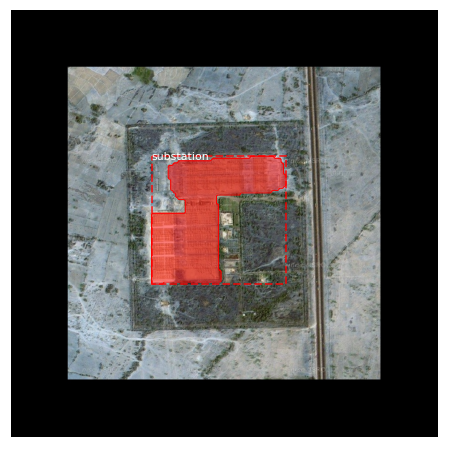

{'id': 96, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2874.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[632, 611, 599, 577, 553, 545, 536, 510, 475, 446, 413, 388, 373, 395, 388, 366, 393, 435, 476, 530, 585, 607, 568, 501, 529, 539, 558, 571, 594, 633, 660, 715, 694, 659, 631, 620, 599, 568, 555, 544, 558, 579, 603, 632], [700, 721, 713, 695, 717, 712, 701, 679, 651, 626, 597, 569, 553, 535, 525, 503, 473, 426, 378, 326, 378, 400, 440, 522, 543, 533, 516, 508, 483, 437, 449, 503, 526, 560, 586, 598, 609, 577, 591, 606, 618, 640, 664, 700]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox          

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


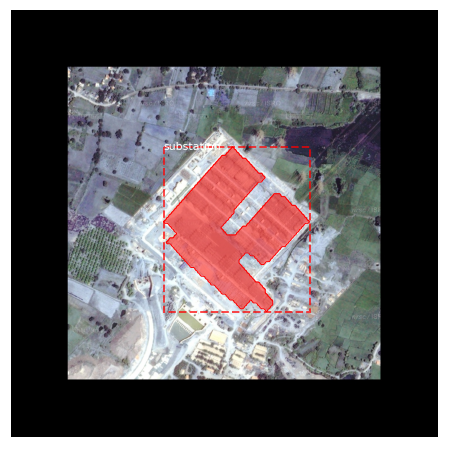

{'id': 99, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/L704.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[453, 456, 454, 451, 300, 302, 384, 392, 712, 707, 644, 642, 654, 649, 453, 457, 459, 637, 637, 457, 460, 463, 649, 647, 460], [332, 419, 457, 514, 514, 563, 565, 713, 716, 504, 497, 453, 452, 324, 332, 459, 509, 509, 455, 459, 426, 449, 444, 424, 426]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  250.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  300.00000  max:  717.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool


c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


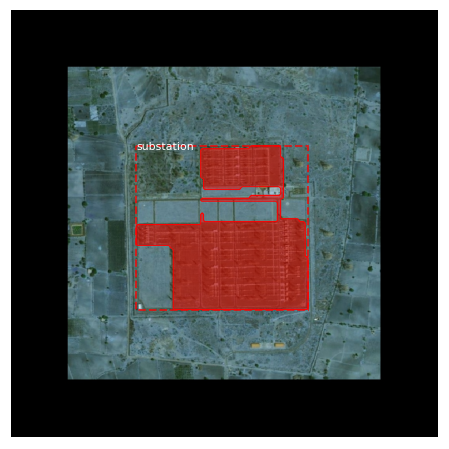

{'id': 99, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/L704.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[453, 456, 454, 451, 300, 302, 384, 392, 712, 707, 644, 642, 654, 649, 453, 457, 459, 637, 637, 457, 460, 463, 649, 647, 460], [332, 419, 457, 514, 514, 563, 565, 713, 716, 504, 497, 453, 452, 324, 332, 459, 509, 509, 455, 459, 426, 449, 444, 424, 426]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  250.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  300.00000  max:  717.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool


c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


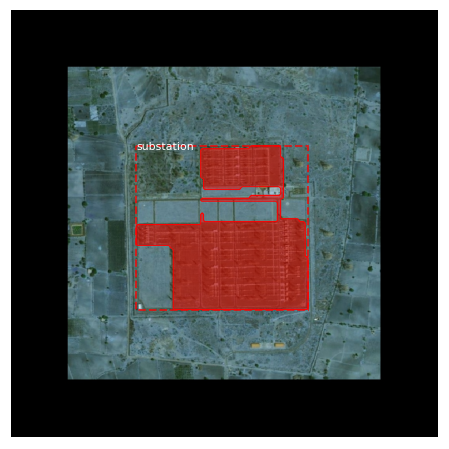

{'id': 91, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2519.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[426, 592, 592, 589, 530, 530, 525, 525, 494, 494, 489, 490, 468, 468, 435, 434, 427, 426], [431, 427, 461, 464, 466, 464, 464, 466, 467, 465, 465, 467, 467, 468, 467, 469, 469, 431]], [[474, 560, 561, 475, 474], [602, 602, 642, 643, 602]], [[473, 560, 560, 474, 473], [584, 584, 596, 596, 584]], [[473, 491, 492, 497, 498, 528, 528, 534, 534, 559, 559, 514, 514, 511, 511, 494, 494, 491, 491, 474, 473], [566, 565, 572, 572, 565, 565, 571, 571, 566, 565, 581, 582, 580, 579, 581, 581, 579, 579, 581, 581, 566]], [[473, 558, 559, 534, 534, 527, 527, 500, 499, 491, 491, 473, 473], [537, 536, 559, 559, 555, 555, 560, 560, 555, 555, 560, 560, 537]], [[472, 481, 481, 488, 488, 500, 499, 505, 506, 517, 518, 523, 523, 528, 528, 531, 531, 557, 558,

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


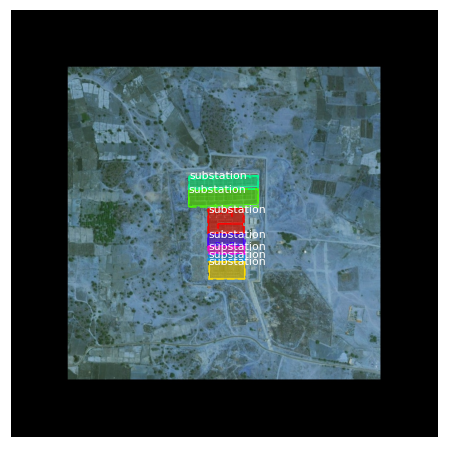

{'id': 96, 'source': 'substation', 'path': 'C:/Users/omrav/Desktop/Artificial Intelligence/Others/Image Processing Paper/Feature Extraction for Electrical Substations/image_chips_converted_new//val/J2874.jpg', 'width': 1024, 'height': 1024, 'polygons': [[[632, 611, 599, 577, 553, 545, 536, 510, 475, 446, 413, 388, 373, 395, 388, 366, 393, 435, 476, 530, 585, 607, 568, 501, 529, 539, 558, 571, 594, 633, 660, 715, 694, 659, 631, 620, 599, 568, 555, 544, 558, 579, 603, 632], [700, 721, 713, 695, 717, 712, 701, 679, 651, 626, 597, 569, 553, 535, 525, 503, 473, 426, 378, 326, 378, 400, 440, 522, 543, 533, 516, 508, 483, 437, 449, 503, 526, 560, 586, 598, 609, 577, 591, 606, 618, 640, 664, 700]]]}
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox          

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


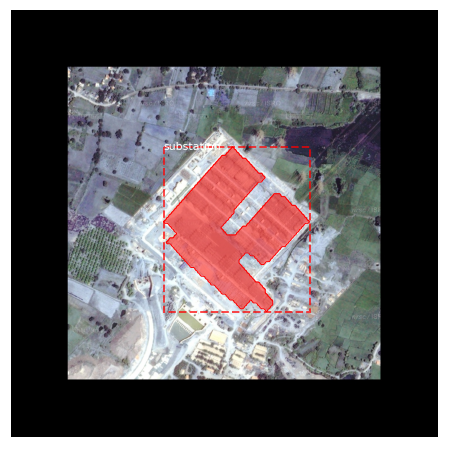

In [32]:
# Test on a random image
image_id = np.random.choice(dataset_val.image_ids, 10)
for i in range(10):
    print(dataset_val.image_info[image_id[i]])
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id[i])

    log("original_image", original_image)
    log("image_meta", image_meta)
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)
    log("gt_mask", gt_mask)

    mask = utils.expand_mask(gt_bbox, gt_mask, original_image.shape)
    mrcnn.visualize.display_instances(original_image, gt_bbox, mask, gt_class_id, 
                                dataset_train.class_names, figsize=(8, 8))

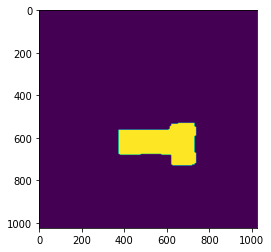

In [27]:
plt.imshow(mask)

## Evaluation

In [29]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id)
    gt_mask = utils.expand_mask(gt_bbox, gt_mask, image.shape)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
c:\users\omrav\appdata\local\programs\python\python38\lib\site-packages\skimage\transform\_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not define

mAP:  0.15
